In [1]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import os
df = pd.read_csv('dataset_train.csv',sep=';')
def dfdel(value):
    return len(eval(value))
print(len(df))
df = df[df['Data'].map(dfdel)== 240]


31383


In [3]:
class0 = df[df['Class_label']==0]
class1 = df[df['Class_label']==1]
class2 = df[df['Class_label']==2]
count = [len(class0),len(class1),len(class2)]
min(count)

6712

In [4]:
data = pd.concat([class0[:min(count)-1],class1[:min(count)-1],class2[:min(count)-1]])

In [5]:
df.head()

,Filename,Test_index,Presentation,Question,Data,Data_2,Class_label
0,6ffe4933-3202-451b-ae6b-fee85cafc829,2,3,7,"[298, 296, 2, -455, -703, -596, -262, -44, 28,...","[-918, -1078, -450, 640, 1503, 1635, 1083, 589...",1
1,8de3189c-8e95-43a2-b6d2-743f097a57fb,0,1,0,"[99, 75, -228, -588, -583, -465, -394, -363, -...","[499, 494, 520, 577, 595, 584, 575, 567, 561, ...",0
2,c74f5292-c8e8-4ef2-a963-7d035e5e3330,3,3,1,"[-369, -543, -644, -670, -636, -586, -524, -44...","[263, 444, 548, 576, 539, 485, 419, 331, 266, ...",2
3,c856d82f-917e-461c-a91f-5298926b8b31,0,3,6,"[-6, -32, -152, -253, -275, -246, -211, -197, ...","[2, 138, 782, 1314, 1471, 1354, 1183, 1127, 10...",1
4,00b38188-82ee-4f1d-9661-485338815751,3,1,2,"[165, 178, 190, 202, 218, 230, 200, 121, 71, 8...","[-722, -711, -700, -686, -669, -665, -712, -79...",2


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['Data'], data['Class_label'], test_size=0.33, random_state=42)
y_test = np.array(y_test)
y_train = np.array(y_train)

In [7]:
X_train=list(X_train)
X_test=list(X_test)
def convX(X):
    for i in range(len(X)):
     X[i]=list(eval(X[i]))
    return np.array(X)
x_train = convX(X_train)
x_test=convX(X_test)

In [8]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

In [9]:
num_classes = len(np.unique(y_train))
print(num_classes)

3


In [10]:
idx = np.random.permutation(len(x_train))
x_train = x_train[idx]
y_train = y_train[idx]

In [11]:
y_train[y_train == -1] = 0
y_test[y_test == -1] = 0

In [12]:
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)

    conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)

    conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)

    gap = keras.layers.GlobalAveragePooling1D()(conv3)

    output_layer = keras.layers.Dense(num_classes, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


model = make_model(input_shape=x_train.shape[1:])
keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [13]:
epochs = 500
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model_v2.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/500
338/338 [==============================] - 8s 21ms/step - loss: 1.1138 - sparse_categorical_accuracy: 0.3451 - val_loss: 1.1201 - val_sparse_categorical_accuracy: 0.3473 - lr: 0.0010
Epoch 2/500
338/338 [==============================] - 7s 20ms/step - loss: 1.1011 - sparse_categorical_accuracy: 0.3544 - val_loss: 1.1101 - val_sparse_categorical_accuracy: 0.3391 - lr: 0.0010
Epoch 3/500
338/338 [==============================] - 7s 21ms/step - loss: 1.1019 - sparse_categorical_accuracy: 0.3455 - val_loss: 1.1119 - val_sparse_categorical_accuracy: 0.3310 - lr: 0.0010
Epoch 4/500
338/338 [==============================] - 8s 22ms/step - loss: 1.1018 - sparse_categorical_accuracy: 0.3445 - val_loss: 1.1050 - val_sparse_categorical_accuracy: 0.3347 - lr: 0.0010
Epoch 5/500
338/338 [==============================] - 8s 22ms/step - loss: 1.1004 - sparse_categorical_accuracy: 0.3446 - val_loss: 1.1124 - val_sparse_categorical_accuracy: 0.3529 - lr: 0.0010
Epoch 6/500
338/338 [====

Epoch 43/500
338/338 [==============================] - 8s 23ms/step - loss: 1.0959 - sparse_categorical_accuracy: 0.3660 - val_loss: 1.0981 - val_sparse_categorical_accuracy: 0.3666 - lr: 0.0010
Epoch 44/500
338/338 [==============================] - 8s 22ms/step - loss: 1.0950 - sparse_categorical_accuracy: 0.3676 - val_loss: 1.1051 - val_sparse_categorical_accuracy: 0.3606 - lr: 0.0010
Epoch 45/500
338/338 [==============================] - 8s 22ms/step - loss: 1.0957 - sparse_categorical_accuracy: 0.3641 - val_loss: 1.0985 - val_sparse_categorical_accuracy: 0.3732 - lr: 0.0010
Epoch 46/500
338/338 [==============================] - 8s 22ms/step - loss: 1.0951 - sparse_categorical_accuracy: 0.3660 - val_loss: 1.1004 - val_sparse_categorical_accuracy: 0.3351 - lr: 0.0010
Epoch 47/500
338/338 [==============================] - 8s 22ms/step - loss: 1.0964 - sparse_categorical_accuracy: 0.3589 - val_loss: 1.0998 - val_sparse_categorical_accuracy: 0.3517 - lr: 0.0010
Epoch 48/500
338/338

Epoch 85/500
338/338 [==============================] - 7s 22ms/step - loss: 1.0933 - sparse_categorical_accuracy: 0.3655 - val_loss: 1.0991 - val_sparse_categorical_accuracy: 0.3558 - lr: 0.0010
Epoch 86/500
338/338 [==============================] - 7s 22ms/step - loss: 1.0935 - sparse_categorical_accuracy: 0.3688 - val_loss: 1.0959 - val_sparse_categorical_accuracy: 0.3595 - lr: 0.0010
Epoch 87/500
338/338 [==============================] - 7s 22ms/step - loss: 1.0928 - sparse_categorical_accuracy: 0.3651 - val_loss: 1.1008 - val_sparse_categorical_accuracy: 0.3592 - lr: 0.0010
Epoch 88/500
338/338 [==============================] - 7s 22ms/step - loss: 1.0926 - sparse_categorical_accuracy: 0.3698 - val_loss: 1.1035 - val_sparse_categorical_accuracy: 0.3521 - lr: 0.0010
Epoch 89/500
338/338 [==============================] - 8s 22ms/step - loss: 1.0928 - sparse_categorical_accuracy: 0.3712 - val_loss: 1.1010 - val_sparse_categorical_accuracy: 0.3566 - lr: 0.0010
Epoch 90/500
338/338

Epoch 127/500
338/338 [==============================] - 8s 22ms/step - loss: 1.0900 - sparse_categorical_accuracy: 0.3720 - val_loss: 1.0948 - val_sparse_categorical_accuracy: 0.3625 - lr: 0.0010
Epoch 128/500
338/338 [==============================] - 8s 23ms/step - loss: 1.0890 - sparse_categorical_accuracy: 0.3849 - val_loss: 1.0979 - val_sparse_categorical_accuracy: 0.3529 - lr: 0.0010
Epoch 129/500
338/338 [==============================] - 7s 22ms/step - loss: 1.0902 - sparse_categorical_accuracy: 0.3737 - val_loss: 1.0967 - val_sparse_categorical_accuracy: 0.3580 - lr: 0.0010
Epoch 130/500
338/338 [==============================] - 8s 22ms/step - loss: 1.0889 - sparse_categorical_accuracy: 0.3803 - val_loss: 1.0945 - val_sparse_categorical_accuracy: 0.3551 - lr: 0.0010
Epoch 131/500
338/338 [==============================] - 8s 22ms/step - loss: 1.0892 - sparse_categorical_accuracy: 0.3822 - val_loss: 1.0972 - val_sparse_categorical_accuracy: 0.3595 - lr: 0.0010
Epoch 132/500
3

338/338 [==============================] - 7s 22ms/step - loss: 1.0869 - sparse_categorical_accuracy: 0.3833 - val_loss: 1.0950 - val_sparse_categorical_accuracy: 0.3621 - lr: 0.0010
Epoch 169/500
338/338 [==============================] - 7s 22ms/step - loss: 1.0855 - sparse_categorical_accuracy: 0.3836 - val_loss: 1.0948 - val_sparse_categorical_accuracy: 0.3599 - lr: 0.0010
Epoch 170/500
338/338 [==============================] - 7s 22ms/step - loss: 1.0874 - sparse_categorical_accuracy: 0.3799 - val_loss: 1.0924 - val_sparse_categorical_accuracy: 0.3703 - lr: 0.0010
Epoch 171/500
338/338 [==============================] - 7s 22ms/step - loss: 1.0862 - sparse_categorical_accuracy: 0.3774 - val_loss: 1.0929 - val_sparse_categorical_accuracy: 0.3732 - lr: 0.0010
Epoch 172/500
338/338 [==============================] - 8s 22ms/step - loss: 1.0865 - sparse_categorical_accuracy: 0.3835 - val_loss: 1.0911 - val_sparse_categorical_accuracy: 0.3688 - lr: 0.0010
Epoch 173/500
338/338 [======

338/338 [==============================] - 7s 22ms/step - loss: 1.0819 - sparse_categorical_accuracy: 0.3895 - val_loss: 1.0928 - val_sparse_categorical_accuracy: 0.3762 - lr: 5.0000e-04
Epoch 210/500
338/338 [==============================] - 8s 22ms/step - loss: 1.0815 - sparse_categorical_accuracy: 0.3968 - val_loss: 1.0921 - val_sparse_categorical_accuracy: 0.3681 - lr: 5.0000e-04
Epoch 211/500
338/338 [==============================] - 7s 22ms/step - loss: 1.0827 - sparse_categorical_accuracy: 0.3891 - val_loss: 1.0921 - val_sparse_categorical_accuracy: 0.3740 - lr: 5.0000e-04
Epoch 212/500
338/338 [==============================] - 7s 22ms/step - loss: 1.0805 - sparse_categorical_accuracy: 0.3931 - val_loss: 1.0960 - val_sparse_categorical_accuracy: 0.3669 - lr: 5.0000e-04
Epoch 213/500
338/338 [==============================] - 8s 22ms/step - loss: 1.0814 - sparse_categorical_accuracy: 0.3888 - val_loss: 1.0916 - val_sparse_categorical_accuracy: 0.3666 - lr: 2.5000e-04
Epoch 214

Epoch 250/500
338/338 [==============================] - 7s 22ms/step - loss: 1.0774 - sparse_categorical_accuracy: 0.3951 - val_loss: 1.0919 - val_sparse_categorical_accuracy: 0.3710 - lr: 1.2500e-04
Epoch 251/500
338/338 [==============================] - 7s 22ms/step - loss: 1.0782 - sparse_categorical_accuracy: 0.3938 - val_loss: 1.0917 - val_sparse_categorical_accuracy: 0.3721 - lr: 1.2500e-04
Epoch 252/500
338/338 [==============================] - 7s 22ms/step - loss: 1.0789 - sparse_categorical_accuracy: 0.3939 - val_loss: 1.0912 - val_sparse_categorical_accuracy: 0.3718 - lr: 1.2500e-04
Epoch 253/500
338/338 [==============================] - 7s 22ms/step - loss: 1.0769 - sparse_categorical_accuracy: 0.4008 - val_loss: 1.0916 - val_sparse_categorical_accuracy: 0.3666 - lr: 1.2500e-04
Epoch 254/500
338/338 [==============================] - 7s 22ms/step - loss: 1.0770 - sparse_categorical_accuracy: 0.3962 - val_loss: 1.0917 - val_sparse_categorical_accuracy: 0.3669 - lr: 1.2500

Epoch 291/500
338/338 [==============================] - 8s 22ms/step - loss: 1.0759 - sparse_categorical_accuracy: 0.4032 - val_loss: 1.0918 - val_sparse_categorical_accuracy: 0.3758 - lr: 1.0000e-04
Epoch 292/500
338/338 [==============================] - 8s 22ms/step - loss: 1.0772 - sparse_categorical_accuracy: 0.3973 - val_loss: 1.0911 - val_sparse_categorical_accuracy: 0.3699 - lr: 1.0000e-04
Epoch 293/500
338/338 [==============================] - 8s 22ms/step - loss: 1.0769 - sparse_categorical_accuracy: 0.4013 - val_loss: 1.0907 - val_sparse_categorical_accuracy: 0.3744 - lr: 1.0000e-04
Epoch 294/500
338/338 [==============================] - 8s 22ms/step - loss: 1.0767 - sparse_categorical_accuracy: 0.3990 - val_loss: 1.0910 - val_sparse_categorical_accuracy: 0.3703 - lr: 1.0000e-04
Epoch 295/500
338/338 [==============================] - 8s 22ms/step - loss: 1.0760 - sparse_categorical_accuracy: 0.4047 - val_loss: 1.0908 - val_sparse_categorical_accuracy: 0.3758 - lr: 1.0000

In [21]:
model = keras.models.load_model("best_model_v2.h5")

test_loss, test_acc = model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

208/208 [==============================] - 1s 4ms/step - loss: 1.0980 - sparse_categorical_accuracy: 0.3624
Test accuracy 0.3624322712421417
Test loss 1.0979537963867188


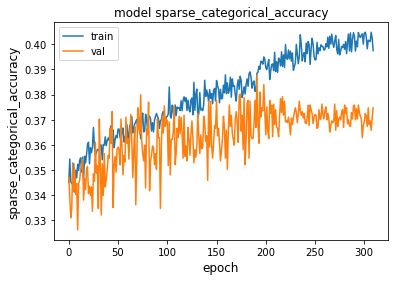

In [22]:
metric = "sparse_categorical_accuracy"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

In [23]:
y = model.predict(x_test)

208/208 [==============================] - 1s 4ms/step


In [24]:
def myprint(i):
    global y
    global y_test
    print(y[i])
    print(y_test[i])

In [90]:
myprint(793)

[0.35399896 0.31558487 0.33041617]
2


<BarContainer object of 50 artists>

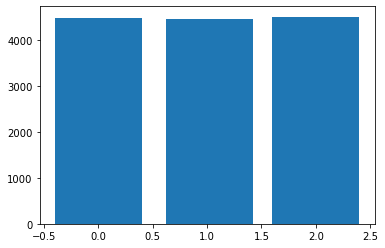

In [19]:
hist = np.histogram(y_train,bins=50)[0]
plt.bar(np.linspace(y_train.min(),y_train.max()),hist)

<BarContainer object of 50 artists>

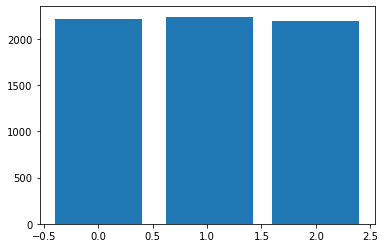

In [20]:
hist = np.histogram(y_test,bins=50)[0]
plt.bar(np.linspace(y_test.min(),y_test.max()),hist)